### Learning Regression Analysis Notebook
#### This notebook is dedicated to learning. Feel free to provide feedback for improvement.

#### it is not done yet i will update.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/kaggle/input/co2-emissions/CO2 Emissions.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Fuel Consumption City (L/100 km): This refers to the amount of fuel, measured in liters, that a vehicle consumes per 100 kilometers of driving under city or urban conditions. 

### Fuel Consumption Hwy (L/100 km): This represents the amount of fuel, measured in liters, that a vehicle consumes per 100 kilometers of driving on highways or open roads. 

### Fuel Consumption Comb (L/100 km): This metric represents the combined fuel consumption of a vehicle, measured in liters, per 100 kilometers of driving. Unlike the individual "City" and "Hwy" measurements, the "Comb" value takes into account a mix of both city and highway driving conditions. It provides an average fuel efficiency figure that considers the vehicle's performance across various scenarios.

### Fuel Consumption Comb (mpg): This metric is an alternative representation of the combined fuel consumption, measured in miles per gallon. Unlike the L/100 km unit, which measures fuel consumption (lower values are better), mpg (miles per gallon) measures fuel efficiency (higher values are better). A higher mpg value indicates that the vehicle can travel more miles using a fixed amount of fuel.

### engine size (measured in liters) is a significant factor in determining a vehicle's power, performance, fuel efficiency, and emissions

In [3]:
df = pd.read_csv("/kaggle/input/co2-emissions/CO2 Emissions.csv")
df1 = df.copy()  # this dataframe for pca
df2 = df.copy()  # this dataframe for subsetting
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(7385, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [7]:
df.isnull().sum().sum()

0

## moderately right-skewed, indicating that while there might be some asymmetry in the data, it's not significantly deviating from a symmetric distribution. In practical terms, this means that there might be a few larger values that extend the tail to the right, but the majority of the data is still clustered around the center.

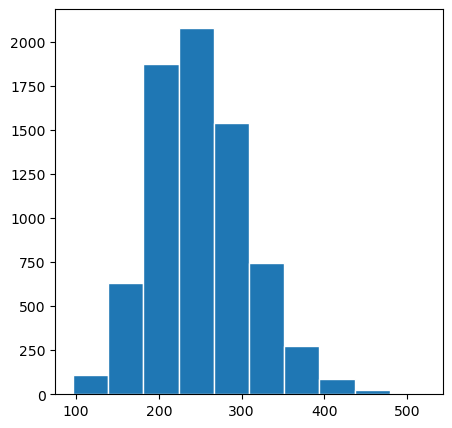

In [8]:
plt.figure(figsize = (5,5))
plt.hist(df['CO2 Emissions(g/km)'],edgecolor="white")
plt.show()

In [9]:
from scipy.stats import skew
print(skew(df['CO2 Emissions(g/km)']))

0.5259869435378954


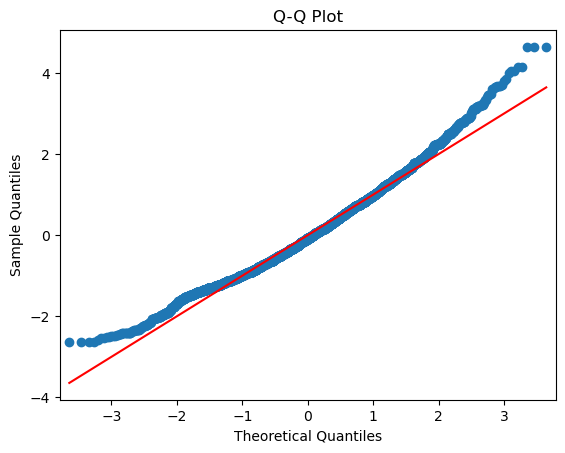

In [10]:
import statsmodels.api as sm
from scipy.stats import norm

data = df['CO2 Emissions(g/km)']

# Create a Q-Q plot
sm.qqplot(data, line='s', dist=norm, fit=True)
plt.title("Q-Q Plot")
plt.show()

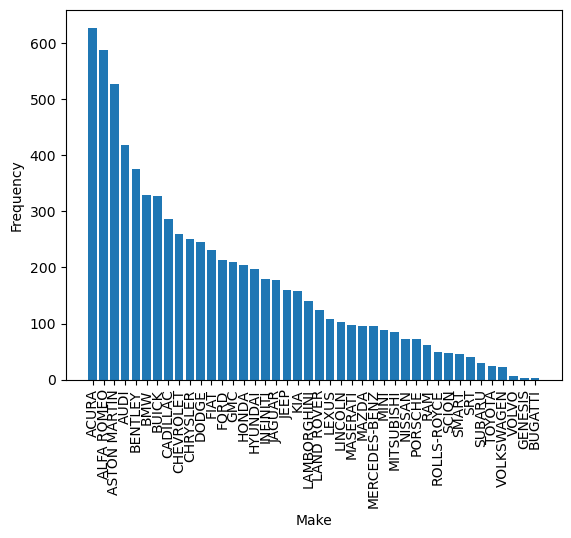

In [11]:
Make =df['Make'].unique()
count = df['Make'].value_counts()

plt.bar(Make,count)
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [12]:
len(df['Model'].unique())

2053

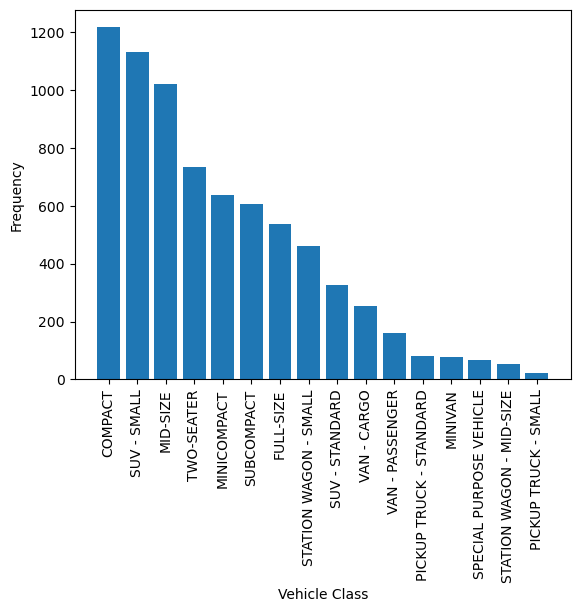

In [13]:
Make =df['Vehicle Class'].unique()
count = df['Vehicle Class'].value_counts()

plt.bar(Make,count)
plt.xlabel('Vehicle Class')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

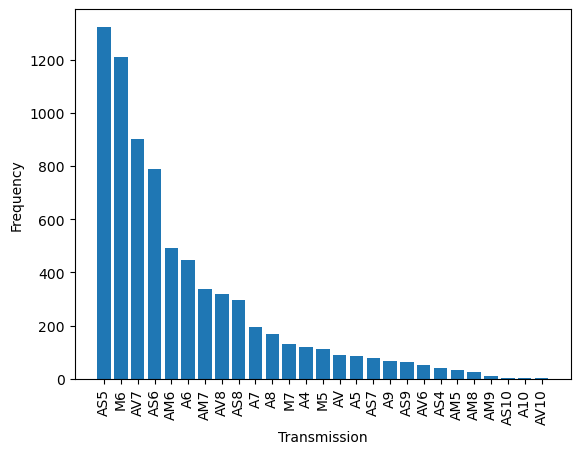

In [14]:
Make =df['Transmission'].unique()
count = df['Transmission'].value_counts()

plt.bar(Make,count)
plt.xlabel('Transmission')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

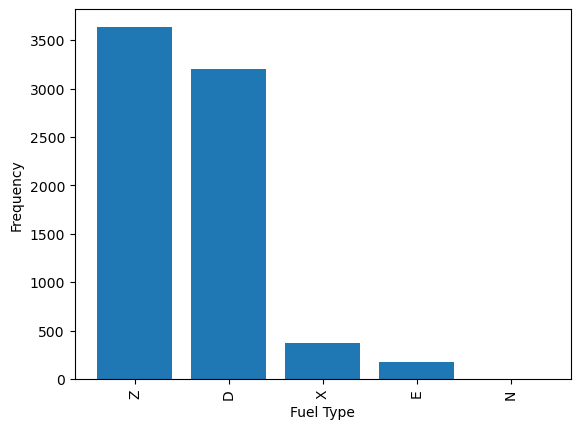

In [15]:
Make =df['Fuel Type'].unique()
count = df['Fuel Type'].value_counts()

plt.bar(Make,count)
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

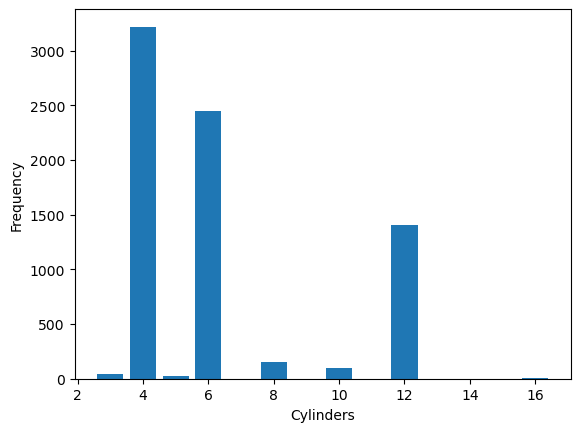

In [16]:
Make =df['Cylinders'].unique()
count = df['Cylinders'].value_counts()

plt.bar(Make,count)
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.show()

## Histogram analysis

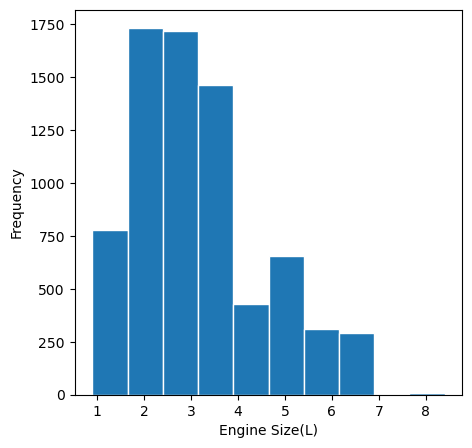

In [17]:
plt.figure(figsize = (5,5))
plt.xlabel('Engine Size(L)')
plt.ylabel('Frequency')
plt.hist(df['Engine Size(L)'],edgecolor="white")
plt.show()

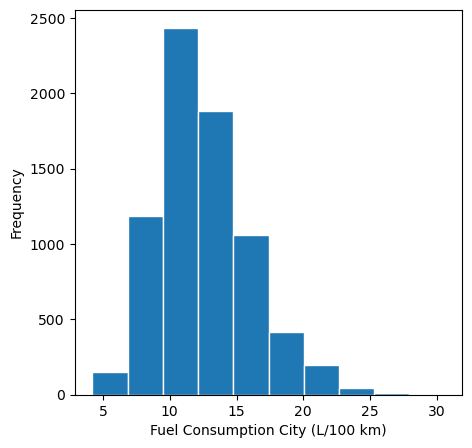

In [18]:
plt.figure(figsize = (5,5))
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Frequency')
plt.hist(df['Fuel Consumption City (L/100 km)'],edgecolor="white")
plt.show()

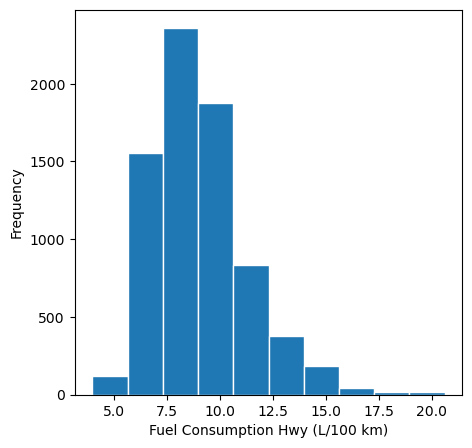

In [19]:
plt.figure(figsize = (5,5))
plt.xlabel('Fuel Consumption Hwy (L/100 km)')
plt.ylabel('Frequency')
plt.hist(df['Fuel Consumption Hwy (L/100 km)'],edgecolor="white")
plt.show()

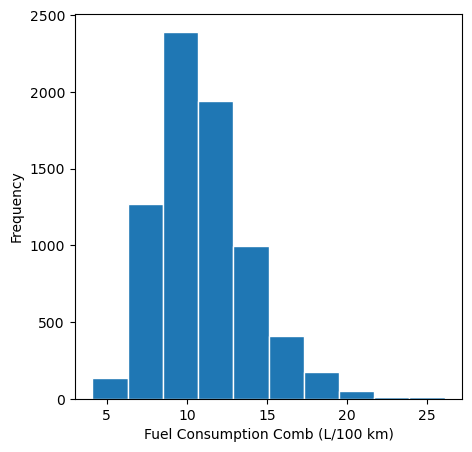

In [20]:
plt.figure(figsize = (5,5))
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('Frequency')
plt.hist(df['Fuel Consumption Comb (L/100 km)'],edgecolor="white")
plt.show()

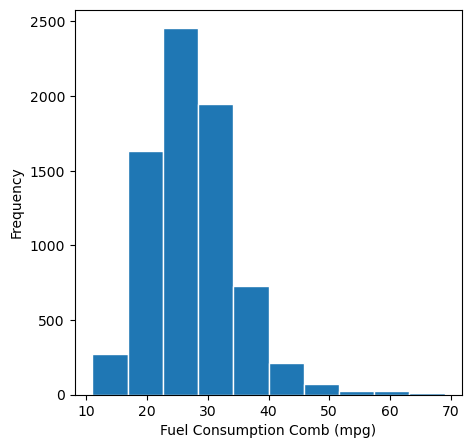

In [21]:
plt.figure(figsize = (5,5))
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('Frequency')
plt.hist(df['Fuel Consumption Comb (mpg)'],edgecolor="white")
plt.show()

# Regression Analysis 

## Linearity:

In [22]:
"""import seaborn as sns
sns.pairplot(df, diag_kind='auto')      # By setting diag_kind to 'auto', Seaborn will automatically choose the appropriate type of plot for the diagonal
                                        #  based on the data type of the variables
plt.show()"""

"import seaborn as sns\nsns.pairplot(df, diag_kind='auto')      # By setting diag_kind to 'auto', Seaborn will automatically choose the appropriate type of plot for the diagonal\n                                        #  based on the data type of the variables\nplt.show()"

The two trend of linear pattern shows some underlying factor not visible under scatterplot.

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption City (L/100 km)'>

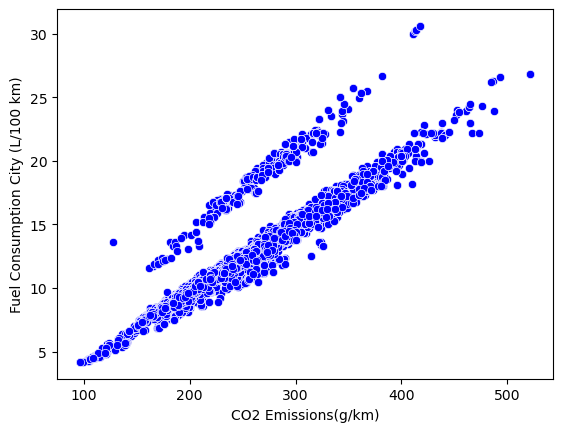

In [23]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption City (L/100 km)'], color='blue', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Hwy (L/100 km)'>

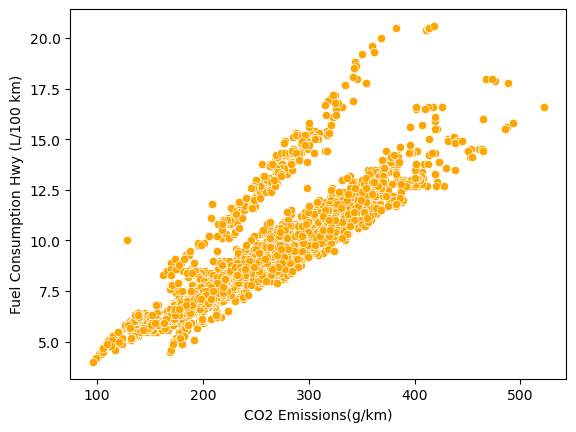

In [24]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption Hwy (L/100 km)'], color='orange', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Comb (L/100 km)'>

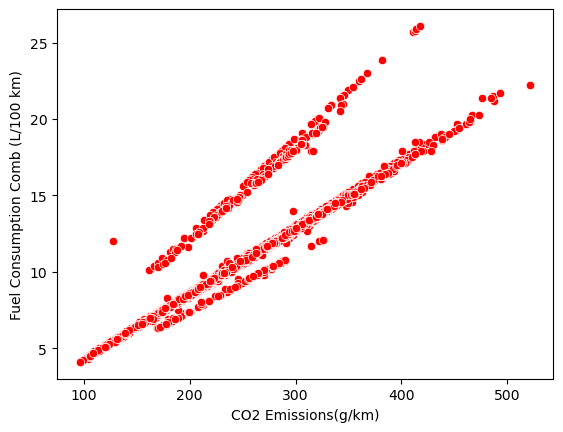

In [25]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption Comb (L/100 km)'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Comb (mpg)'>

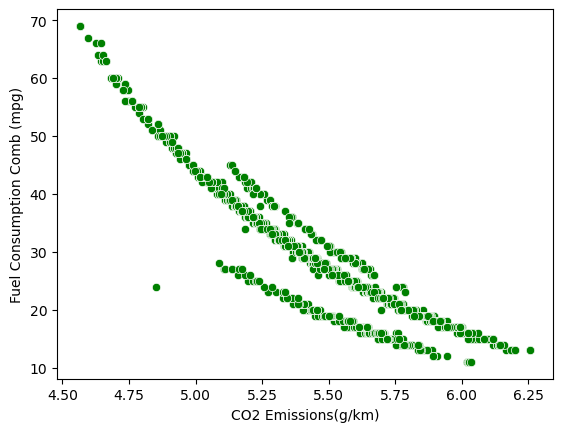

In [26]:
sns.scatterplot(x=np.log(df['CO2 Emissions(g/km)']), y=df['Fuel Consumption Comb (mpg)'], color='green', marker='o')
#df['transformed CO2 Emissions(g/km)'] = np.log(df['CO2 Emissions(g/km)'])

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Engine Size(L)'>

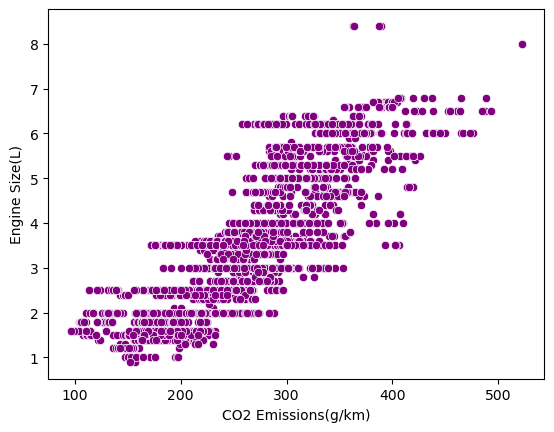

In [27]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Engine Size(L)'], color='purple', marker='o')

## Multicollinearity

###  the data have correlation coefficients above 0.75 between multiple pairs of independent variables, it suggests a strong multicollinearity issue.

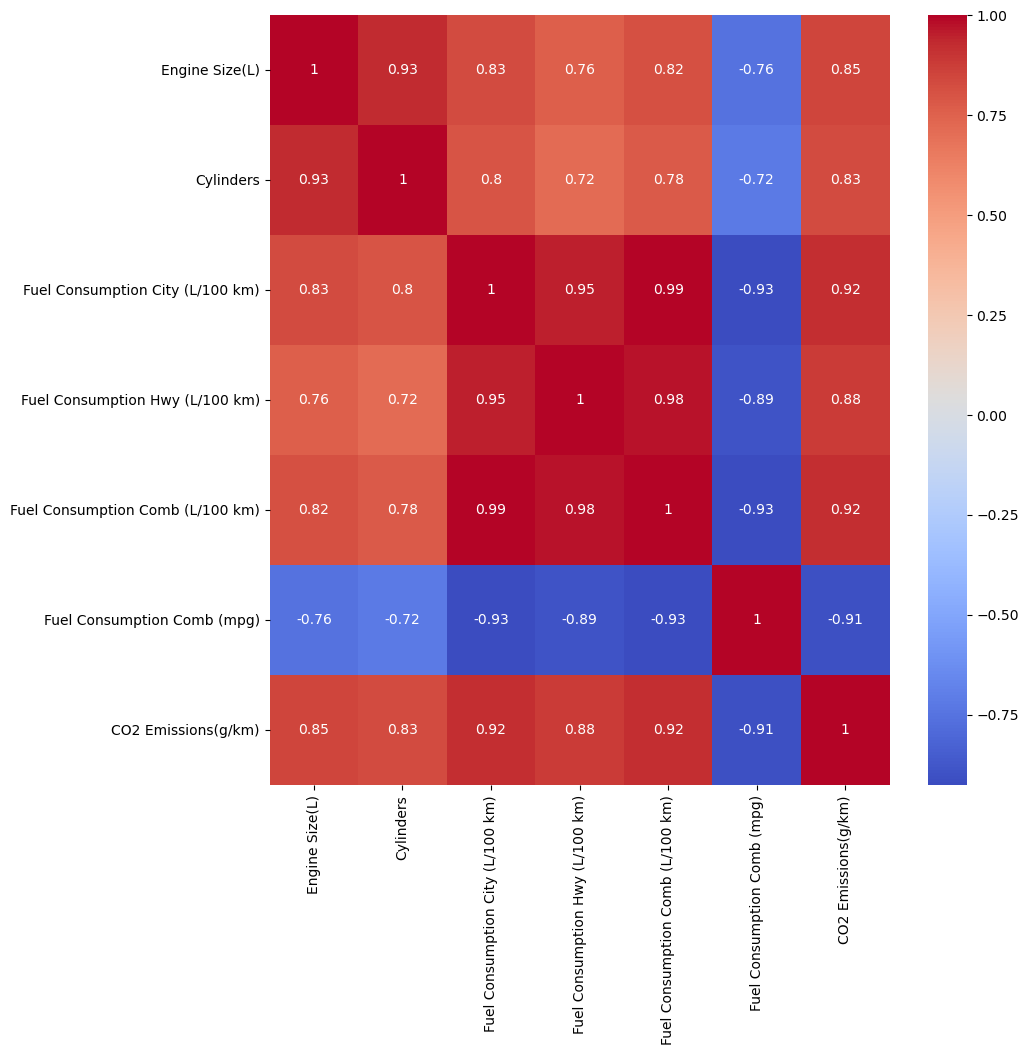

In [28]:
correlation_matrix = df.corr(method='pearson', min_periods=1, numeric_only=True)
plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

## Dummy varaiables (optional - only for multilinear)

In [29]:
make_variables = pd.get_dummies(df['Make'], prefix='Make', drop_first=True) # dropfirst for dummyvariable trap
df = pd.concat([df, make_variables], axis=1)
df.drop(['Make'], axis=1, inplace=True)

In [30]:
vechicle_class_variables = pd.get_dummies(df['Vehicle Class'], prefix='Make', drop_first=True)
df = pd.concat([df, vechicle_class_variables], axis=1)
df.drop(['Vehicle Class'], axis=1, inplace=True)

In [31]:
trans_variables = pd.get_dummies(df['Transmission'], prefix='Make', drop_first=True)
df = pd.concat([df, trans_variables], axis=1)
df.drop(['Transmission'], axis=1, inplace=True)

In [32]:
dum_variables = pd.get_dummies(df['Fuel Type'], prefix='Make', drop_first=True)
df = pd.concat([df, dum_variables], axis=1)
df.drop(['Fuel Type'], axis=1, inplace=True)

In [33]:
dum_variables = pd.get_dummies(df['Cylinders'], prefix='Make', drop_first=True)
df = pd.concat([df, dum_variables], axis=1)
df.drop(['Cylinders'], axis=1, inplace=True)

# first model - simple linear regression

## choosing highly corelated variable

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Fuel Consumption Hwy (L/100 km)'], df['CO2 Emissions(g/km)'], test_size=0.2, random_state=43)

In [35]:
import statsmodels.api as sm

X = sm.add_constant(X_train)           # intercept
y = y_train                            # dependent
model = sm.OLS(y, X).fit()

### 1. r bar or r:  78.5% of the variance in CO2 emissions.

### 2. A high F-statistic value (2.162e+04) suggests that the model as a whole is statistically significant. 

### 3. Associated p-value (Prob (F-statistic)) is very close to zero, indicating strong evidence against the null hypothesis that all coefficients are zero.

###  4. Low p-values (typically below 0.05) indicate that a coefficient is statistically significant.

### 5. Durbin-Watson: A test for autocorrelation in the residuals. A value around 2 suggests no significant autocorrelation.

### 6. Jarque-Bera (JB), Prob(JB): A test for normality of residuals. Low p-value suggests that the residuals are not normally distributed. so the transormation should be applied for this

The condition number (Cond. No.) is a measure of multicollinearity in a regression model. 
In your case, a condition number of 39.3 suggests that there might be some degree of multicollinearity in your regression model. While there's no strict threshold for what constitutes a "high" condition number, a value much larger than 1 can be indicative of multicollinearity.
f you have only one independent variable (feature) and you're still observing a relatively high condition number, it might indicate that there's some instability in your regression model. In the case of a single independent variable, multicollinearity isn't directly relevant since there are no other variables to be correlated with.

## condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))

In [36]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.785
Model:                             OLS   Adj. R-squared:                  0.785
Method:                  Least Squares   F-statistic:                 2.162e+04
Date:                 Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                         11:16:26   Log-Likelihood:                -27918.
No. Observations:                 5908   AIC:                         5.584e+04
Df Residuals:                     5906   BIC:                         5.585e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


Jarque-Bera (JB): The JB statistic is a measure of the skewness and kurtosis of the residuals. A higher JB statistic indicates departures from normality. In your case, the JB statistic is quite high, suggesting potential non-normality in the distribution of residuals.

Prob(JB): The probability associated with the Jarque-Bera statistic. This p-value helps you determine whether the residuals follow a normal distribution. A low p-value (close to 0) suggests that you have evidence to reject the null hypothesis of normality, indicating that the residuals are not normally distributed.

The combination of a high JB statistic and a very low p-value (0.00) suggests that the residuals of your regression model are not normally distributed. This could indicate that there might be some issue with the assumptions of the linear regression model.

The Jarque-Bera test is based on the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and kurtosis measures the "tailedness" or peakedness of the distribution.

The Jarque-Bera test statistic is calculated using the following formula:

## JB = (n / 6) * (skewness^2 + 0.25 * (kurtosis - 3)^2)

Where:

n is the number of observations.
skewness is the skewness of the residuals.
kurtosis is the kurtosis of the residuals.
The Jarque-Bera test statistic follows a chi-squared distribution with 2 degrees of freedom under the null hypothesis of normality.

The p-value associated with the Jarque-Bera statistic is then calculated based on the chi-squared distribution. A low p-value suggests that the observed Jarque-Bera statistic is significantly different from what would be expected under a normal distribution. This prompts you to reject the null hypothesis of normality.

In [37]:
X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)

MAE says that on average, the predictions deviate from the actual values by around 18.24 units. 

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 18.238044826851997
Mean Squared Error: 777.7628081160785
Root Mean Squared Error: 27.888399167325446


##  Residual analysis 

There is no clear patterns which is good

<Axes: >

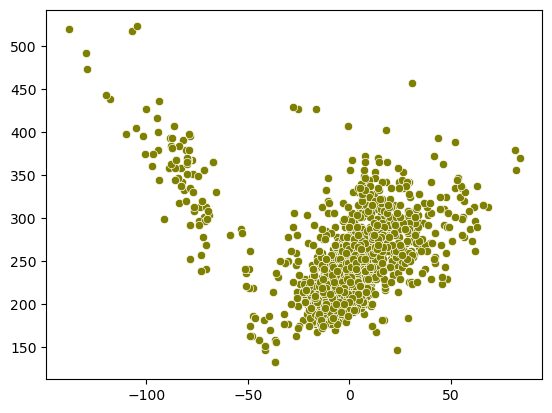

In [39]:
residuals = y_test - y_pred
sns.scatterplot(x=residuals, y=y_pred, color='olive', marker='o')

There is no normality in residuals, which violates the assumption.

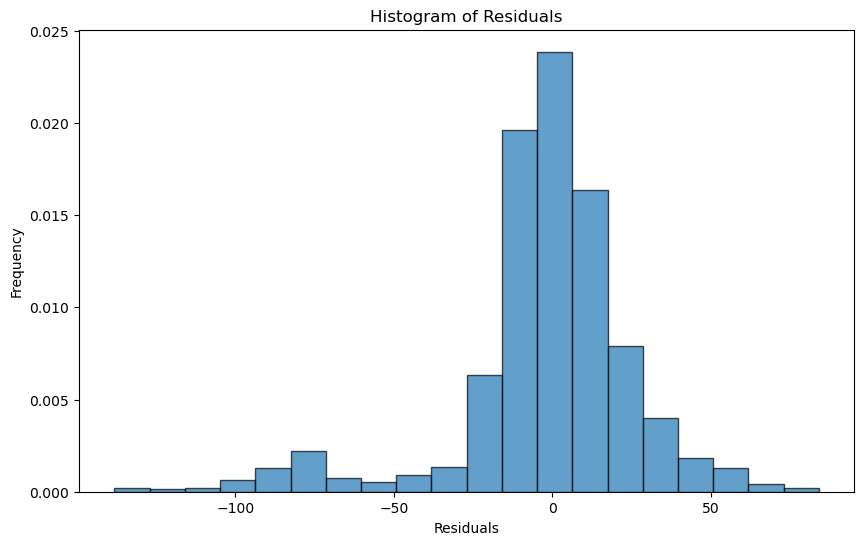

In [40]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

There are some outliers.

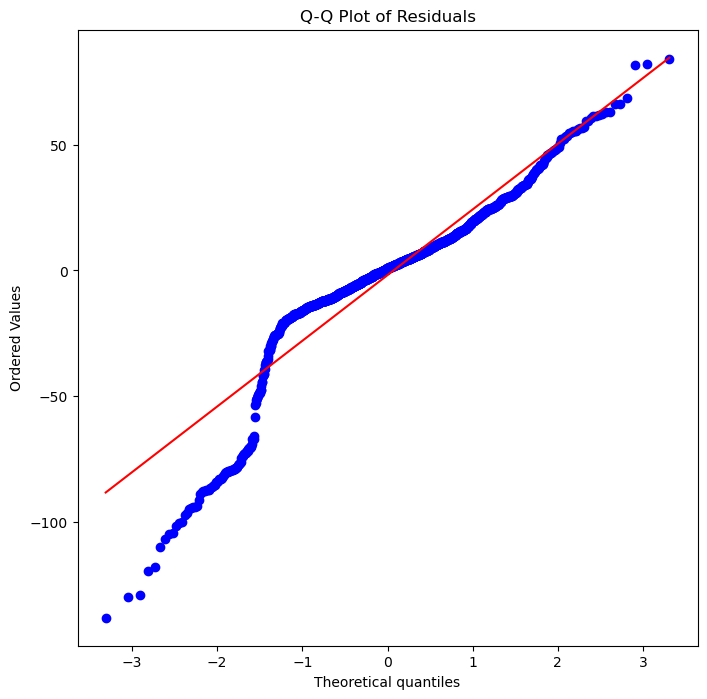

In [41]:
import scipy.stats as stats

plt.figure(figsize=(8,8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

### checking for outliers

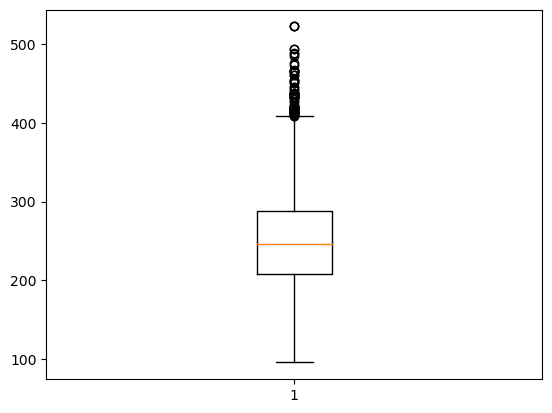

In [42]:
plt.boxplot(df['CO2 Emissions(g/km)']);

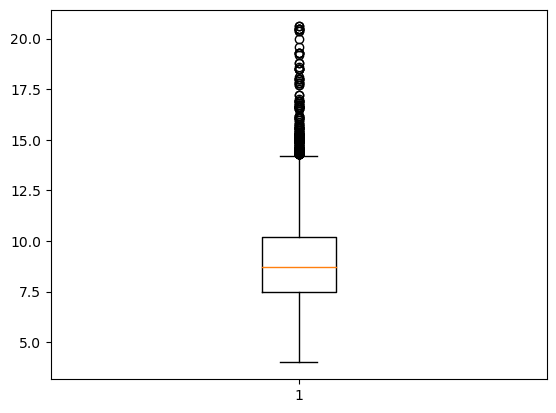

In [43]:
plt.boxplot(df['Fuel Consumption Hwy (L/100 km)']);

In [44]:
dfsub = df[(df['CO2 Emissions(g/km)'] < 400) & (df['Fuel Consumption Hwy (L/100 km)'] < 15.0)]


#### After removing outliers, the adj.r square of the model is better.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(dfsub['Fuel Consumption Hwy (L/100 km)'], dfsub['CO2 Emissions(g/km)'], test_size=0.2, random_state=43)
X = sm.add_constant(X_train)
y = y_train  
model = sm.OLS(y, X).fit()
print(model.summary())

X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)

residual  = y_test - y_pred

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.807
Model:                             OLS   Adj. R-squared:                  0.806
Method:                  Least Squares   F-statistic:                 2.398e+04
Date:                 Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                         11:16:29   Log-Likelihood:                -26430.
No. Observations:                 5755   AIC:                         5.286e+04
Df Residuals:                     5753   BIC:                         5.288e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


Still, the normality of residuals are still not normally distributed after removing outliers

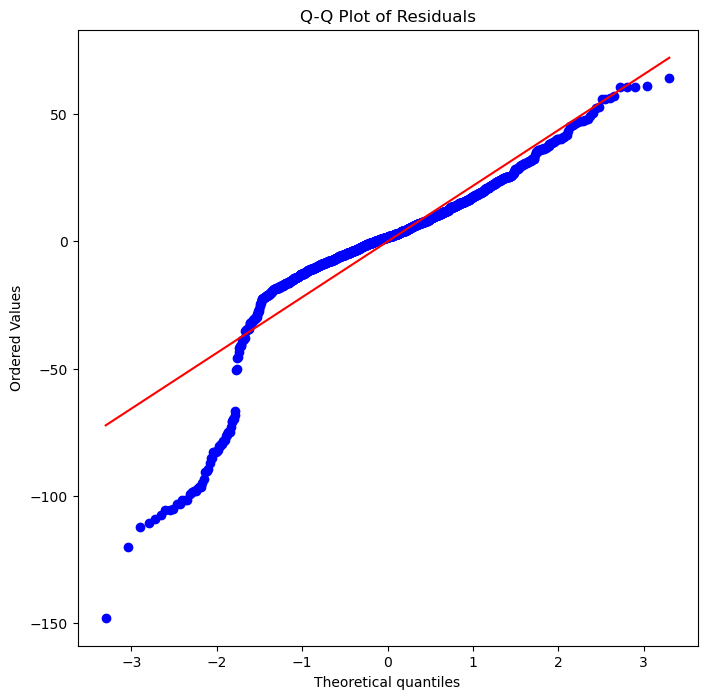

In [46]:
import scipy.stats as stats

plt.figure(figsize=(8, 8))
stats.probplot(residual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

#### applying transoformation to see whether the problem gets solved

#### The adjusted r square is 0.84 which is better after transforming both variables.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(np.log(dfsub['Fuel Consumption Hwy (L/100 km)']), np.log(dfsub['CO2 Emissions(g/km)']), test_size=0.2, random_state=43)
X = sm.add_constant(X_train)
y = y_train  
model = sm.OLS(y, X).fit()
print(model.summary())

X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.845
Model:                             OLS   Adj. R-squared:                  0.845
Method:                  Least Squares   F-statistic:                 3.126e+04
Date:                 Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                         11:16:30   Log-Likelihood:                 5738.3
No. Observations:                 5755   AIC:                        -1.147e+04
Df Residuals:                     5753   BIC:                        -1.146e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


Still, the tails are not following the normality.

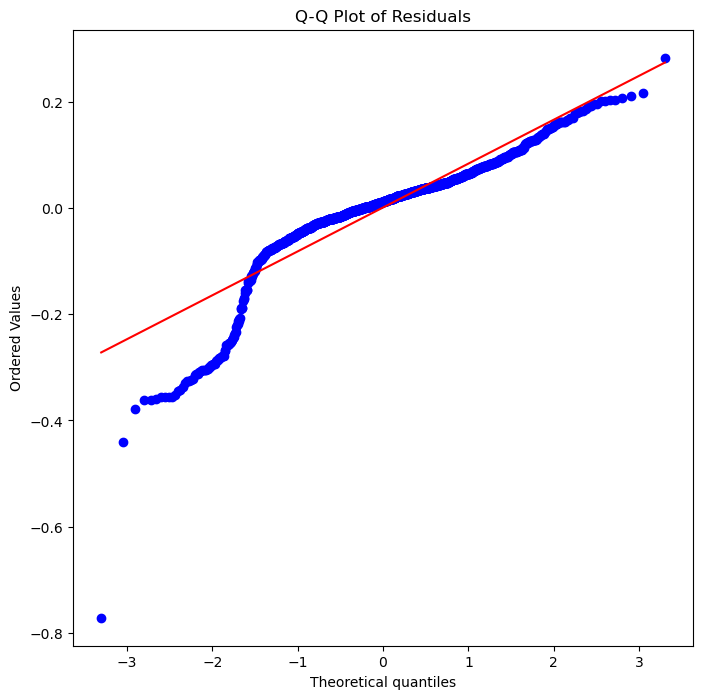

In [48]:
residual  = y_test - y_pred

plt.figure(figsize=(8,8))
stats.probplot(residual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

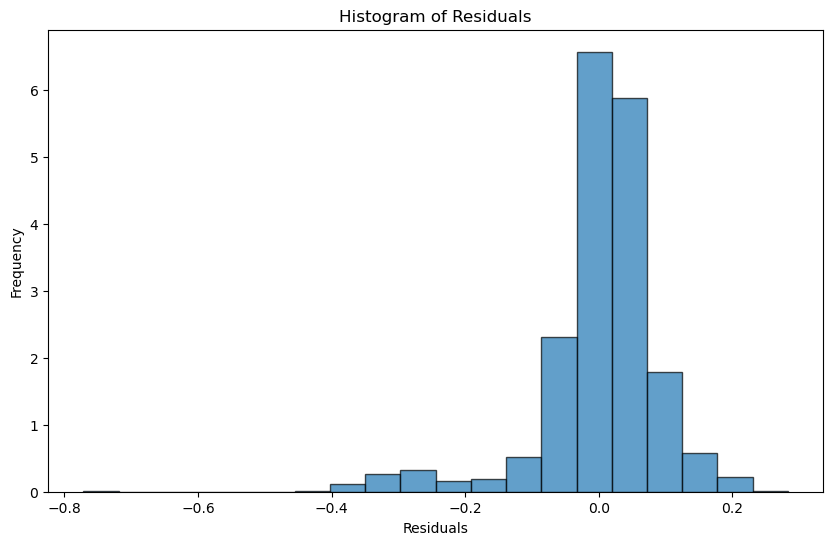

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(residual, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

### Residual vs. Independent

assumption of homoscedasticity (constant variance of residuals)

In [50]:
len(y_pred)

1439

In [51]:
len(residual)

1439

Interpreting the plot:

If the spread of residuals remains roughly constant across different fitted values, the assumption of homoscedasticity is likely met.
If the spread of residuals widens or narrows systematically as the fitted values increase or decrease, this indicates heteroscedasticity (violation of the assumption).
That is if you see any funnel shape then strongly there is heteroscedasticity.

In our case, it is roughly constant.


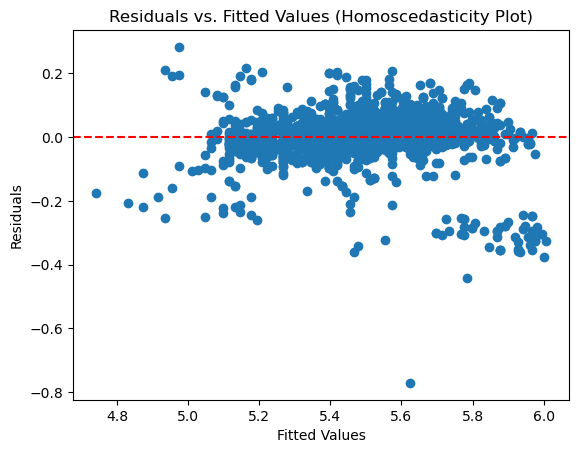

In [52]:
plt.scatter(y_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')  # Add a reference line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Homoscedasticity Plot)')
plt.show()

Although, we got 0.83 adj.r square and assumptions are roughly true. We go for any other models.

# Multiple linear regression ( taking all the features to see difference)

In [53]:
df.drop('Model',axis=1,inplace = True)

In [54]:
df.columns

Index(['Engine Size(L)', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Make_ALFA ROMEO',
       'Make_ASTON MARTIN', 'Make_AUDI', 'Make_BENTLEY', 'Make_BMW',
       'Make_BUGATTI', 'Make_BUICK', 'Make_CADILLAC', 'Make_CHEVROLET',
       'Make_CHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_FORD', 'Make_GENESIS',
       'Make_GMC', 'Make_HONDA', 'Make_HYUNDAI', 'Make_INFINITI',
       'Make_JAGUAR', 'Make_JEEP', 'Make_KIA', 'Make_LAMBORGHINI',
       'Make_LAND ROVER', 'Make_LEXUS', 'Make_LINCOLN', 'Make_MASERATI',
       'Make_MAZDA', 'Make_MERCEDES-BENZ', 'Make_MINI', 'Make_MITSUBISHI',
       'Make_NISSAN', 'Make_PORSCHE', 'Make_RAM', 'Make_ROLLS-ROYCE',
       'Make_SCION', 'Make_SMART', 'Make_SRT', 'Make_SUBARU', 'Make_TOYOTA',
       'Make_VOLKSWAGEN', 'Make_VOLVO', 'Make_FULL-SIZE', 'Make_MID-SIZE',
       'Make_MINICOMPACT', 'Make_MINIVAN', 'Make_PICKUP T

In [55]:
X = df.drop('CO2 Emissions(g/km)',axis = 1)
y = df['CO2 Emissions(g/km)']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
X_test.shape

(1477, 98)

We know we have mulitcollinearity, but the adjust r2 is 0.99 which means there must me overfitting.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Number of samples in the testing set
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

R-squared: 0.9942225471298078
Adjusted R-squared: 0.9938116687689379


Although overfitting, the residuals are normally distributed than simple linear regression. but how?

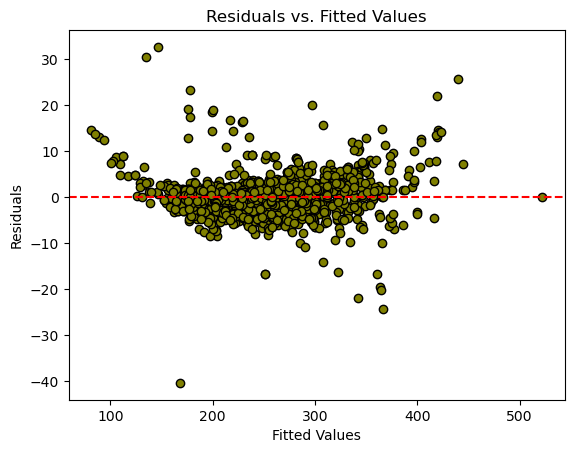

In [59]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, c='olive',edgecolors ='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

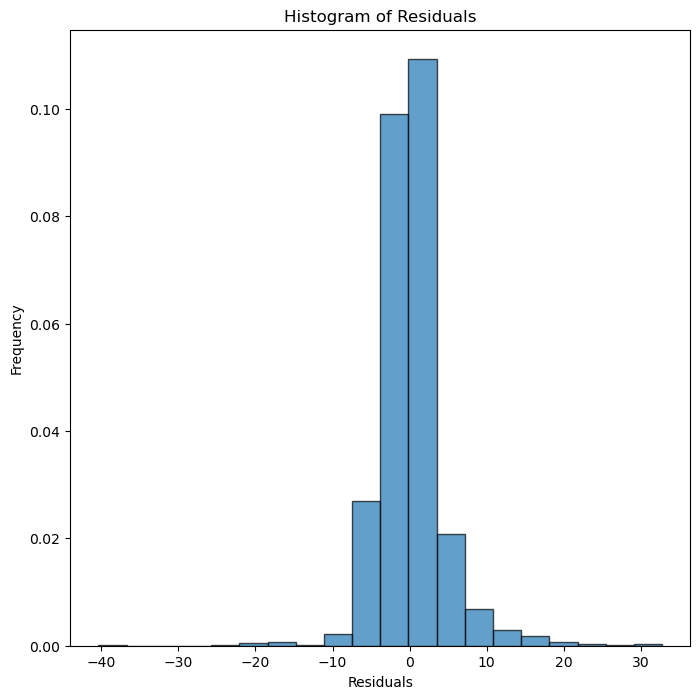

In [60]:
plt.figure(figsize=(8,8))
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

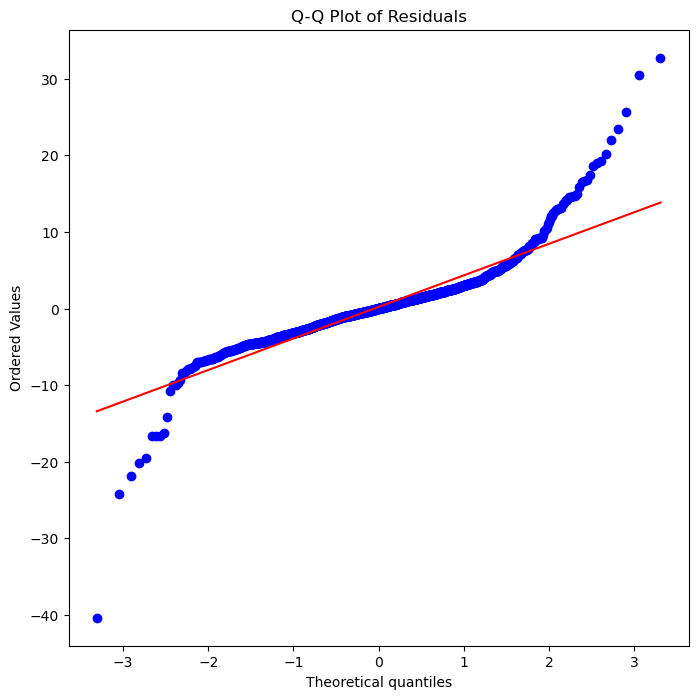

In [61]:
plt.figure(figsize=(8,8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

We can do regularization techniques like lasso or ridge regression, or Huber regression, for this or we can also do pca to reduce the impact of multicolinearity.

# PCA

In [62]:
df1.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [63]:
df1.drop(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type','CO2 Emissions(g/km)'],axis = 1,inplace = True)

In [64]:
X = df1

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

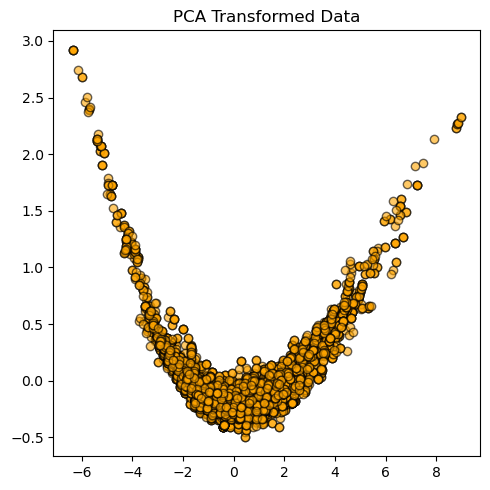

Explained variance ratio: [0.95804813 0.02998033]


In [67]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6,color = 'orange',edgecolors = 'black')
plt.title('PCA Transformed Data')
plt.tight_layout()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

In [68]:
X = X_pca[:, 0]
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
model = LinearRegression()

X_train = X_train.reshape(-1, 1)  # Reshape to 2D array
X_test = X_test.reshape(-1, 1)    # Reshape to 2D array

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Number of samples in the testing set
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

R-squared: 0.8596809377210666
Adjusted R-squared: 0.8595858061534198


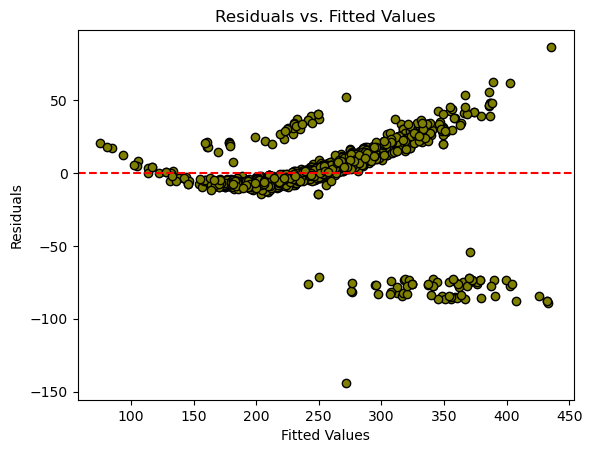

In [70]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, c='olive',edgecolors ='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

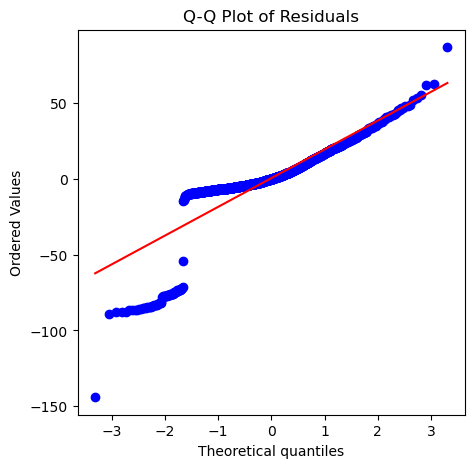

In [71]:
plt.figure(figsize=(5,5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Subsetting - to diagnose dual linear trend - eda

### There is a problem with data than models since we observed dual linear trends on the dependent and independent variables.

#### Subsetting your dataset based on the categorical variable could be a very useful step in understanding the two distinct linear trends you're observing in your scatter plot. By breaking down your data into different groups based on this categorical variable, you might be able to uncover the factors that are driving these trends.

In [72]:
df2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


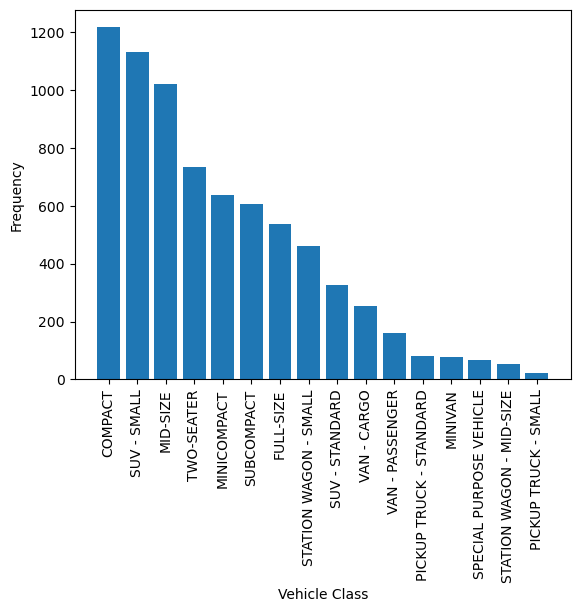

In [73]:
class_ =df2['Vehicle Class'].unique()
count = df2['Vehicle Class'].value_counts()

plt.bar(class_,count)
plt.xlabel('Vehicle Class')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [74]:
vehicle_class_subsets = {}

for vehicle_class in class_:
    subset = df2[df2['Vehicle Class'] == vehicle_class]
    vehicle_class_subsets[vehicle_class] = subset
    

In [75]:
vehicle_class_subsets.keys()

dict_keys(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT', 'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL', 'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'])

In [76]:
compact_subset = vehicle_class_subsets['COMPACT']
suv_small_subset = vehicle_class_subsets['SUV - SMALL']
midsize_subset = vehicle_class_subsets['MID-SIZE']
twoseater_subset = vehicle_class_subsets['TWO-SEATER']

There is a dual trend in first 3 of the subset classes. we need to find the hidden insights for that pattern

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption City (L/100 km)'>

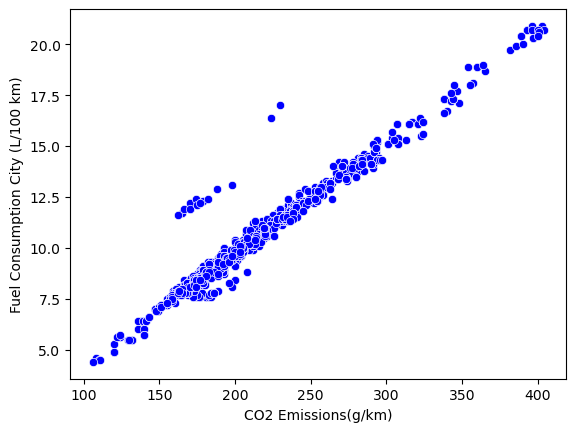

In [77]:
sns.scatterplot(x=compact_subset['CO2 Emissions(g/km)'], y=compact_subset['Fuel Consumption City (L/100 km)'], color='blue', marker='o')

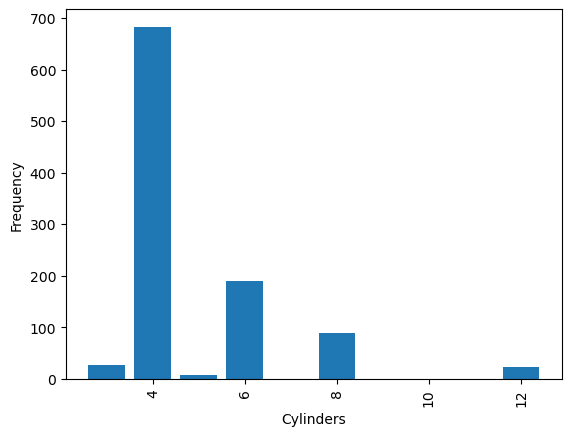

In [78]:
class_ =compact_subset['Cylinders'].unique()
count = compact_subset['Cylinders'].value_counts()

plt.bar(class_,count)
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [79]:
compact_subset_sub = compact_subset[
    (compact_subset['CO2 Emissions(g/km)'] > 150) & (compact_subset['CO2 Emissions(g/km)'] < 250) & 
    (compact_subset['Fuel Consumption City (L/100 km)'] > 10.0) & (compact_subset['Fuel Consumption City (L/100 km)'] < 17.5)
]

In [80]:
compact_subset_sub.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

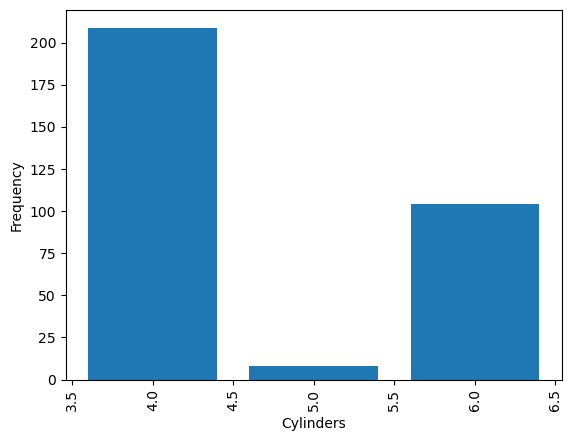

In [81]:
class_ =compact_subset_sub['Cylinders'].unique()
count = compact_subset_sub['Cylinders'].value_counts()

plt.bar(class_,count)
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption City (L/100 km)'>

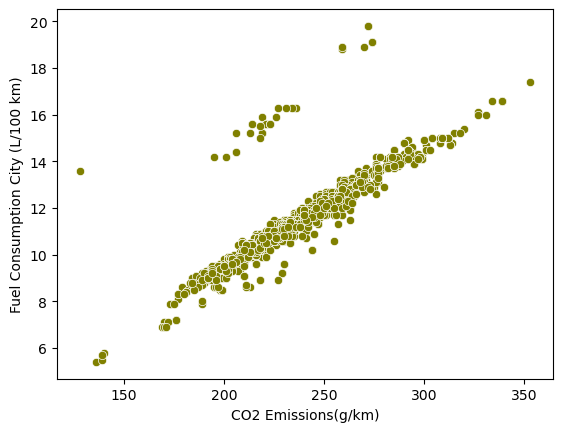

In [82]:
sns.scatterplot(x=suv_small_subset['CO2 Emissions(g/km)'], y=suv_small_subset['Fuel Consumption City (L/100 km)'], color='olive', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption City (L/100 km)'>

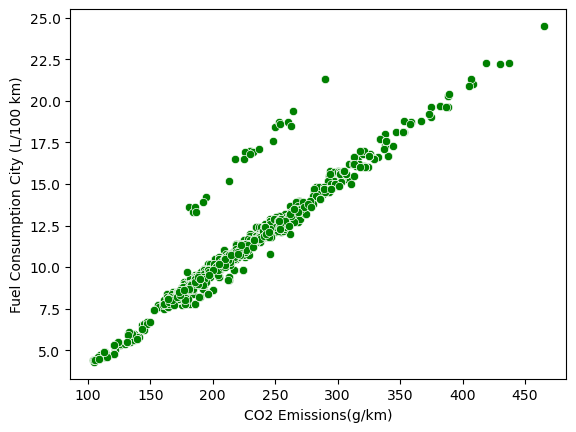

In [83]:
sns.scatterplot(x=midsize_subset['CO2 Emissions(g/km)'], y=midsize_subset['Fuel Consumption City (L/100 km)'], color='green', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption City (L/100 km)'>

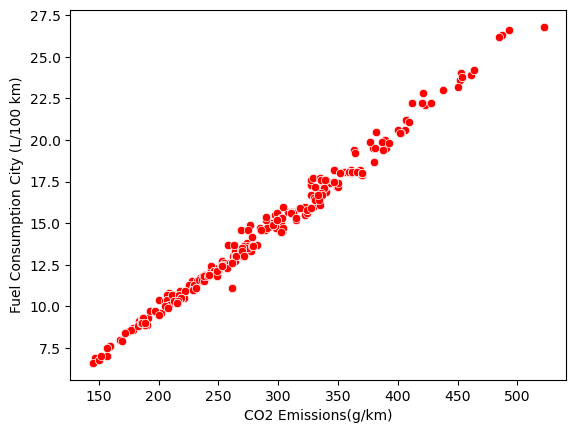

In [84]:
sns.scatterplot(x=twoseater_subset['CO2 Emissions(g/km)'], y=twoseater_subset['Fuel Consumption City (L/100 km)'], color='red', marker='o')